# FIMO Analysis
The primary purpose of this notebook is to analyze the FIMO output(s) of the primary workflow from RWPE1 (using TSS or 5' UTR) and display the statistics. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Input files

In [3]:
# Read in the RNA-seq targets
rna = pd.read_csv("../RWPE1/rna/condition_ERG_results.csv")
# Read in the FIMO
fimo = pd.read_csv("fimo.tsv", sep = "\t", comment = '#')
fimo.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,MOTIF,NaN,ENSG00000178104::1:148808466-148808566,12,26,+,15.8818,5.400000e-07,0.14,ACTGGGGTGGCCAGG
1,MOTIF,NaN,ENSG00000275131::1:120701289-120701389,13,27,-,15.8818,5.400000e-07,0.14,ACTGGGGTGGCCAGG
2,MOTIF,NaN,ENSG00000125967::20:33670765-33670865,27,41,+,15.5182,8.430000e-07,0.14,TCTGGGGTGGCAGGG
3,MOTIF,NaN,ENSG00000115648::2:237546405-237546505,59,73,+,15.1727,1.260000e-06,0.14,CTGGGGGTGGCTGTG
4,MOTIF,NaN,ENSG00000141506::17:8885086-8885186,70,84,-,15.1727,1.260000e-06,0.14,CCTGGGGAGGCAGGG


In [4]:
rna.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000117318,2962.745670,-2.862370,0.074568,-38.386289,0.0,0.0
1,ENSG00000126709,1864.580502,-4.528673,0.094237,-48.056214,0.0,0.0
2,ENSG00000137962,8903.503601,2.534852,0.061708,41.077844,0.0,0.0
3,ENSG00000117525,6750.090378,2.489323,0.052461,47.450965,0.0,0.0
4,ENSG00000081277,48205.311285,-3.370403,0.044858,-75.134318,0.0,0.0


The RNA-seq files contain the significant targets from the RNA-seq. To cross-reference the FIMO targets, we use the sequence_name column from FIMO. 

In [4]:
names = list(fimo['sequence_name'].str.split(':', expand = True)[0])
names[:10]

['ENSG00000178104',
 'ENSG00000275131',
 'ENSG00000125967',
 'ENSG00000115648',
 'ENSG00000141506',
 'ENSG00000116017',
 'ENSG00000116017',
 'ENSG00000162511',
 'ENSG00000214655',
 'ENSG00000140853']

## Analyzing RNA-seq
Now, we check to see which of our RNA targets had the motif. 

In [17]:
rna_targets = rna[rna['Unnamed: 0'].isin(names)]
len(rna_targets)

181

### Scatterplot
We can visually depict the signal to see if there's any significant trend. We first sort the data.

C:\Users\Tim\Anaconda3\envs\bio\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


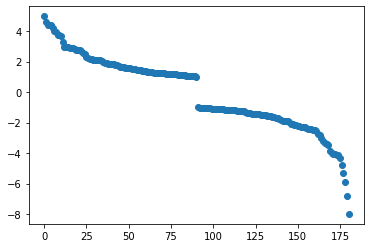

In [19]:
rna_targets.sort_values(by = ['log2FoldChange'], ascending = False, inplace = True, ignore_index = True)
plot = plt.scatter(rna_targets.index, rna_targets.log2FoldChange)